# Analysis

In [58]:
# basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# small tools
import datetime as dt
import time
import tqdm
import lemmy
import itertools

# regex, nltk
import re
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer # VADER 
nltk.download('vader_lexicon')
from sentida import Sentida # sentida

# sklearn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from afinn import Afinn

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dana_tiger/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [59]:
nltk.download('stopwords')
stopwords = stopwords.words('danish')
stemmer = SnowballStemmer("danish")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dana_tiger/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
nltk.download('stopwords')
stopwords = stopwords.words('danish')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dana_tiger/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: 'list' object has no attribute 'words'

## Load datasets

In [3]:
ft_sygeplej2x = pd.read_csv('ft_sygeplej2x.csv')
dr_sygeplej2x = pd.read_csv('dr_sygeplej2x.csv')
tv2_sygeplej2x = pd.read_csv('tv2_sygeplej2x.csv')

ft = ft_sygeplej2x.copy() 
dr = dr_sygeplej2x.copy() 
tv2 = tv2_sygeplej2x.copy()

### Cleaning
- lower case (already done)
- remove non-alphanumeric characters
- remove numbers

In [4]:
def cleaner(document):
    document = document.lower() #To lower case
    document = re.sub(r'[^\w\s]','', document) #Remove non-alphanumeric characters
    document = re.sub(r'[^\D+]','', document) #Remove numeric characters
    return document

### Pre-processing
- Tokenize
- Remove stopwords
- Stemming

In [52]:
def pre_process(df): 
    tokens = [nltk.tokenize.word_tokenize(df['content'][i]) for i in range(0, len(df))]
    tokens = list(itertools.chain(*tokens)) # list of lists to list
    
    nostop = [i for i in tokens if i not in stopwords]

    stemmed = [stemmer.stem(word) for word in nostop]
    
    return stemmed

# 1-gram: Bag of words

In [6]:
def BoW(df): 
    count = CountVectorizer()
    df_array = df['content']
    bag = count.fit_transform(df_array)
    
    count_array = bag.toarray() #Make the bag to an array
    matrix = pd.DataFrame(data=count_array,columns = count.get_feature_names())
    
    return matrix

# 2-gram

In [7]:
def two_gram(df):
    count = CountVectorizer(ngram_range=(2,2)) #Choose only 2-grams

    df_array = df['content']
    bag = count.fit_transform(df_array)

    count_array = bag.toarray() #Make the bag to an array
    matrix = pd.DataFrame(data=count_array,columns = count.get_feature_names()) #Input the bag and the words into a dataframe
    
    return matrix

# tf-idf

In [8]:
def tfidf(df):
    ############################## bag #################################
    count = CountVectorizer(ngram_range=(2,2)) #Choose only 2-grams
    
    df_array = df['content']
    bag = count.fit_transform(df_array)
    ############################## bag #################################
    
    tfidf = TfidfTransformer()
    bag_tfidf = tfidf.fit_transform(bag) 

    tfidf_array = bag_tfidf.toarray() #Make the bag to an array
    matrix_tfidf = pd.DataFrame(data=tfidf_array,columns = count.get_feature_names())
    return matrix_tfidf

# Apply functions

In [9]:
sample = tv2[0:3].copy()

In [10]:
df = sample # insert wanted df 

In [11]:
df['content_cleaned'] = df['content'].apply(cleaner)

In [12]:
BoW(df)

,100,11,154,2009,2010,2011,30,300,40,434,...,vist,vores,være,waste,what,åbnede,år,øjenvidne,økonomiske,ønsker
0,1,1,0,1,1,1,0,1,0,0,...,1,2,0,1,1,0,2,0,1,1
1,0,0,1,0,1,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,1,2,0,0


In [13]:
two_gram(df)

,100 jobs,11 arbejdsgivere,11 tiden,154 januar,2009 til,2010 til,2011 det,2011 således,30 skud,300 sygeplejersker,...,what waste,åbnede ild,år er,år han,år har,år krise,øjenvidne fortæller,øjenvidne til,økonomiske politik,ønsker et
0,1,1,0,0,1,0,0,1,0,1,...,1,0,1,0,1,0,0,0,1,1
1,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,1,1,0,0


In [14]:
tfidf(df)

,100 jobs,11 arbejdsgivere,11 tiden,154 januar,2009 til,2010 til,2011 det,2011 således,30 skud,300 sygeplejersker,...,what waste,åbnede ild,år er,år han,år har,år krise,øjenvidne fortæller,øjenvidne til,økonomiske politik,ønsker et
0,0.041786,0.041786,0.000000,0.000000,0.041786,0.000000,0.000000,0.041786,0.000000,0.041786,...,0.041786,0.000000,0.041786,0.000000,0.041786,0.000000,0.000000,0.000000,0.041786,0.041786
1,0.000000,0.000000,0.000000,0.082018,0.000000,0.082018,0.082018,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.082018,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.058458,0.000000,0.000000,0.000000,0.000000,0.000000,0.058458,0.000000,...,0.000000,0.058458,0.000000,0.058458,0.000000,0.000000,0.058458,0.058458,0.000000,0.000000


# Sentiment analysis


### AFINN

Create sentiment predictions.

In [15]:
afn = Afinn(emoticons=False)

for i, row in df.iterrows():
    print('Predicted sentiment polarity: ', afn.score(row.content)) # AFINN polarity score

Predicted sentiment polarity:  -2.0
Predicted sentiment polarity:  -3.0
Predicted sentiment polarity:  0.0


In [16]:
afinn_preds = []

for i in df['content'].values:             # polarity score (again)
    score = afn.score(i)
    
    if score <= 0:                         # Classifiy as positive (1)/negative (0). 
        afinn_preds.append(0)
    else:
        afinn_preds.append(1)

In [17]:
afinn_preds # prints afinn sentiment predictions

[0, 0, 0]

### VADER
- neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
- NOTE: The compound score is the one most commonly used for sentiment analysis by most researchers, including the authors.
- compound = Calling it a 'normalized, weighted composite score' is accurate.

In [18]:
analyzer = SentimentIntensityAnalyzer()

for i, row in df.iterrows():
    print('Predicted sentiment polarity: ', analyzer.polarity_scores(row.content)) # VADER polarity score

Predicted sentiment polarity:  {'neg': 0.012, 'neu': 0.988, 'pos': 0.0, 'compound': -0.6808}
Predicted sentiment polarity:  {'neg': 0.024, 'neu': 0.976, 'pos': 0.0, 'compound': -0.4767}
Predicted sentiment polarity:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [19]:
vader_preds = []

for i in df['content'].values:    # polarity score (again)
    score = analyzer.polarity_scores(i)["compound"]
    
    if score<=0:                  # Classifiy as positive (1)/negative (0). 
        vader_preds.append(0)
    else:
        vader_preds.append(1)

In [20]:
vader_preds # prints vader sentiment predictions

[0, 0, 0]

### Sentida
- output arguments: ["mean", "total", "by_sentence_mean", "by_sentence_total"]

In [93]:
df = ft

In [94]:
SV = Sentida()

for i, row in df.iterrows():
    print('Predicted sentiment polarity: ', SV.sentida(row.content, 
                                            output = 'mean', 
                                            normal = True)) # Sentida polarity score

Predicted sentiment polarity:  0.0974238222599463
Predicted sentiment polarity:  0.15442676482760703
Predicted sentiment polarity:  0.10932853525682118
Predicted sentiment polarity:  0.11305002194958601


KeyboardInterrupt: 

In [22]:
sentida_preds = []

for i in df['content'].values:         # polarity score (again)
    score = SV.sentida(i, output = 'mean')
    
    if score<=0:                       # Classifiy as positive (1)/negative (0). 
        sentida_preds.append(0)
    else:
        sentida_preds.append(1)

In [23]:
sentida_preds

[1, 1, 0]

##### Print all sentiment results

In [24]:
#print(afinn_preds)
#print(vader_preds)
#print(sentida_preds)

# Topic modelling (leave out)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='danish', max_df=0.1, max_features=5000)
bag = count.fit_transform(df['content'].values)

ValueError: not a built-in stop list: danish

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5,random_state=123) 
review_topics = lda.fit_transform(bag)

In [ ]:
n_top_words = 5
word_names = count.get_feature_names()
for topic_idx, topic in enumerate(lda.components_): 
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join([word_names[i]
    for i in topic.argsort()\
        [:-n_top_words - 1:-1]]))

### Sentida function

In [114]:
def sentida_values(df): 
    sentida_preds = []

    SV = Sentida()

    for row in tqdm.tqdm(df['content'].values): 
        score = SV.sentida(row, output = 'mean', normal = True)
        
    return sentida_preds

In [106]:
def sentida_values(df): 
    sentida_preds = []

    SV = Sentida()

    for i, row in df.iterrows():
        score = SV.sentida(row.content, output = 'mean', normal = True)
        sentida_preds.append(score)
        
    return sentida_preds

In [30]:
def sentida_indicator(df): 
    sentida_preds = []
    
    for i in df['content'].values:         # polarity score (again)
        score = SV.sentida(i, output = 'mean', normal = True)

        if score<=0:                       # Classifiy as positive (1)/negative (0). 
            sentida_preds.append(0)
        else:
            sentida_preds.append(1)

    return sentida_preds

### Apply Sentida function

##### FT

In [108]:
sentida_preds_ft = sentida_values(ft[0:1])

In [110]:
sentida_preds_ft

[0.0974238222599463]

##### DR

In [68]:
df = dr # define df 

In [69]:
# NOTICE!!!!!
# check date is formatted correctly as datetime object by type(dr.date[0])
df['date'] = pd.to_datetime(df['date'])

In [ ]:
for i in tqdm.tqdm(ft): 
    sentida_values(ft)

In [91]:
ft

,Unnamed: 0,session,meetingnumber,date,location,group,content,path,source
0,1,20111,102,2012-09-13,Folketingssalen,Folketinget,det næste punkt på dagsordenen er: 3) 3. behan...,/ODAXML/Referat/samling/20111/20111_M102_helem...,FT
1,5,20111,48,2012-02-21,Folketingssalen,Folketinget,det sidste punkt på dagsordenen er: 17) foresp...,/ODAXML/Referat/samling/20111/20111_M48_helemo...,FT
2,6,20111,57,2012-03-14,Folketingssalen,Folketinget,det sidste punkt på dagsordenen er: 2) besvare...,/ODAXML/Referat/samling/20111/20111_M57_helemo...,FT
3,7,20111,58,2012-03-20,Folketingssalen,Folketinget,det næste punkt på dagsordenen er: 20) 1. beha...,/ODAXML/Referat/samling/20111/20111_M58_helemo...,FT
4,8,20111,62,2012-03-27,Folketingssalen,Folketinget,det sidste punkt på dagsordenen er: 11) forhan...,/ODAXML/Referat/samling/20111/20111_M62_helemo...,FT
...,...,...,...,...,...,...,...,...,...
291,515,20211,84,2022-03-31,Folketingssalen,Folketinget,det næste punkt på dagsordenen er: 8) forhandl...,/ODAXML/Referat/samling/20211/20211_M84_helemo...,FT
292,516,20211,84,2022-03-31,Folketingssalen,Folketinget,det sidste punkt på dagsordenen er: 13) foresp...,/ODAXML/Referat/samling/20211/20211_M84_helemo...,FT
293,517,20211,86,2022-04-05,Folketingssalen,Folketinget,det næste punkt på dagsordenen er: 5) udvidet ...,/ODAXML/Referat/samling/20211/20211_M86_helemo...,FT
294,518,20211,86,2022-04-05,Folketingssalen,Folketinget,det sidste punkt på dagsordenen er: 6) 1. beha...,/ODAXML/Referat/samling/20211/20211_M86_helemo...,FT


In [90]:
sentida_preds_dr = sentida_values(ft[0:10])

0it [00:08, ?it/s]


KeyboardInterrupt: 

In [86]:
len(sentida_preds_dr)

3607

In [72]:
df['sentiment'] = sentida_preds_dr # create new column: sentiment

In [73]:
sentiment_preds_dr_grouped = df.groupby([df.date.dt.year, df.date.dt.month])['sentiment'].mean()

In [74]:
sentiment_preds_dr_grouped

date  date
2012  1       0.017287
      2       0.104123
      3       0.033308
      4       0.010859
      5       0.106137
                ...   
2021  8       0.025333
      9       0.027745
      10      0.033543
      11      0.013567
      12      0.064588
Name: sentiment, Length: 115, dtype: float64

### plots

ValueError: x and y must be the same size

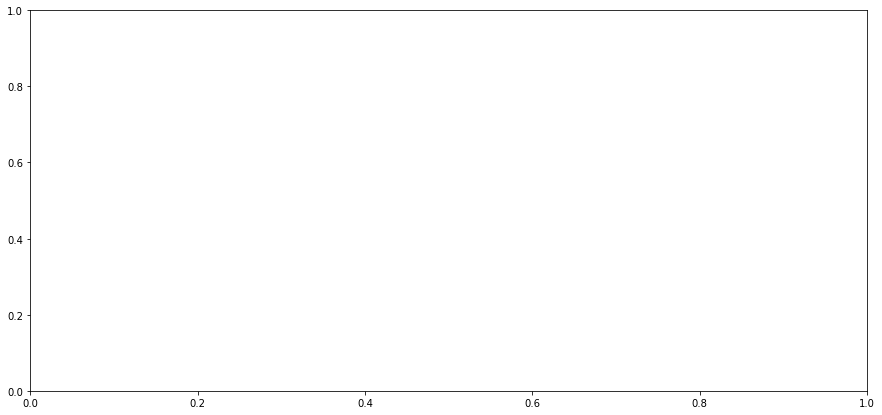

In [75]:
# making your dataframe
date = df.groupby([df.date.dt.year, df.date.dt.month])
value = df.sentiment

# plot setup
fig,ax= plt.subplots()
fig.set_size_inches(15, 7)

# scatter
ax.scatter(x = date,
           y = df["sentiment"])

# setting x axis bounds
ax.set_xlim((df["date"].min(), df["date"].max()))

In [140]:
p_df = pd.DataFrame({"class": [1,1,2,2,1], "a": [2,3,2,3,2]})
p_df

,class,a
0,1,2
1,1,3
2,2,2
3,2,3
4,1,2


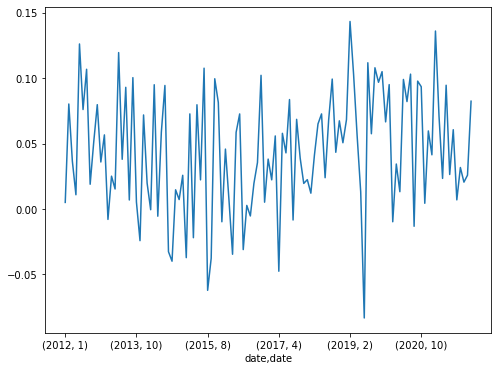

In [76]:
fig, ax = plt.subplots(figsize=(8,6))
group = df.groupby([df.date.dt.year, df.date.dt.month])['sentiment'].mean()
plot = group.plot(kind = 'line', ax = ax)

### tv2

In [ ]:
df = tv2

In [ ]:
tv2.sentiment

In [ ]:
sentida_preds = sentida(df)

In [ ]:
df['sentiment'] = sentida_preds # create sentiment column

In [ ]:
# check date is formatted as datetime object
# type(dr.date[0])
df['date'] = pd.to_datetime(df['date'])

In [ ]:
sentiment_grouped = df.groupby([df.date.dt.year, df.date.dt.month])['sentiment'].mean()

In [ ]:
# making your dataframe
date = df.groupby([df.date.dt.year, df.date.dt.month])
value = df.sentiment

# plot setup
fig,ax= plt.subplots()
fig.set_size_inches(15, 7)

# scatter
ax.scatter(x=df["date"].values,
           y=df["sentiment"].values)

# setting x axis bounds
ax.set_xlim((df["date"].min(), df["date"].max()))

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
group = df.groupby([df.date.dt.year, df.date.dt.month])['sentiment'].mean()
plot = group.plot('scatterplot', ax = ax)
matplotlib.pyplot.scatter()

In [ ]:
sentiment_grouped